A partir del dataframe happiness obtén otro (Mexico) donde sólo almacenes la información de México. Haz que la columna Country or region quede como índice:

In [1]:
import pandas as pd

happiness = pd.read_csv("/content/happiness_report.csv")
happiness = happiness.set_index('Country or region')

mexico = happiness.loc[['Mexico']]
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto:

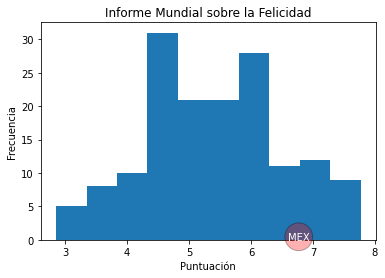

In [2]:
import matplotlib.pyplot as plt

props_bbox = {'boxstyle': 'circle',
              'facecolor': 'red',
              'alpha': 0.3}

axScore = plt.hist(happiness["Score"])
axScore = plt.xlabel("Puntuación")
axScore = plt.ylabel("Frecuencia")
axScore = plt.title("Informe Mundial sobre la Felicidad")
axScore = plt.text(mexico["Score"],0, "MEX",bbox=props_bbox).set_color("white")


Construye un box plot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación:

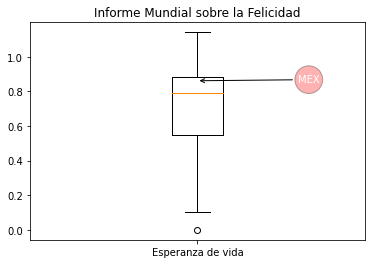

In [3]:
axHealthy = plt.boxplot(happiness["Healthy life expectancy"].dropna(),labels=['Esperanza de vida'])
axHealthy = plt.title("Informe Mundial sobre la Felicidad")
axHealthy = plt.annotate("MEX",xy=(1,mexico["Healthy life expectancy"]),xytext=(1.3,0.85),arrowprops=dict(arrowstyle='->'),bbox=props_bbox).set_color("white")


Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe obtenido anteriormente:

Country or region             Mexico
GDP per capita                 1.070
Social support                 1.323
Healthy life expectancy        0.861
Freedom to make life choices   0.433
Generosity                     0.074
Perceptions of corruption      0.073


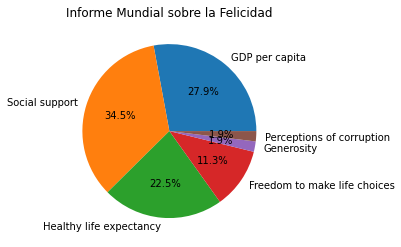

In [4]:
import numpy as np

factors = mexico.T.drop(["Overall rank", "Score"])
print(factors)

suma = factors['Mexico'].sum()
porcentaje = (factors / suma) * 100

axFactors = plt.pie(np.array(porcentaje).ravel(),labels=porcentaje.index,autopct='%1.1f%%')
axFactors = plt.title("Informe Mundial sobre la Felicidad")

Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores:

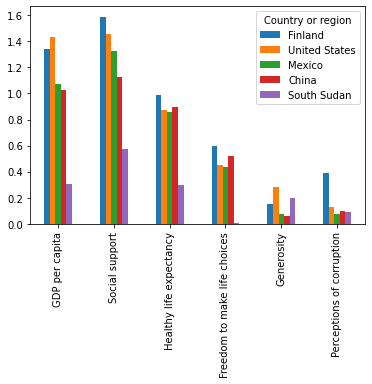

In [5]:
paises = happiness.loc[['Finland', 'United States', 'Mexico', 'China', 'South Sudan']]
paises = paises.drop(labels=["Overall rank", "Score"], axis=1)
paises = paises.T

axCountry = paises.plot(kind="bar")

Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores para determinar qué factor influye más en la evaluación:

Text(0, 0.5, 'Perceptions of corruption')

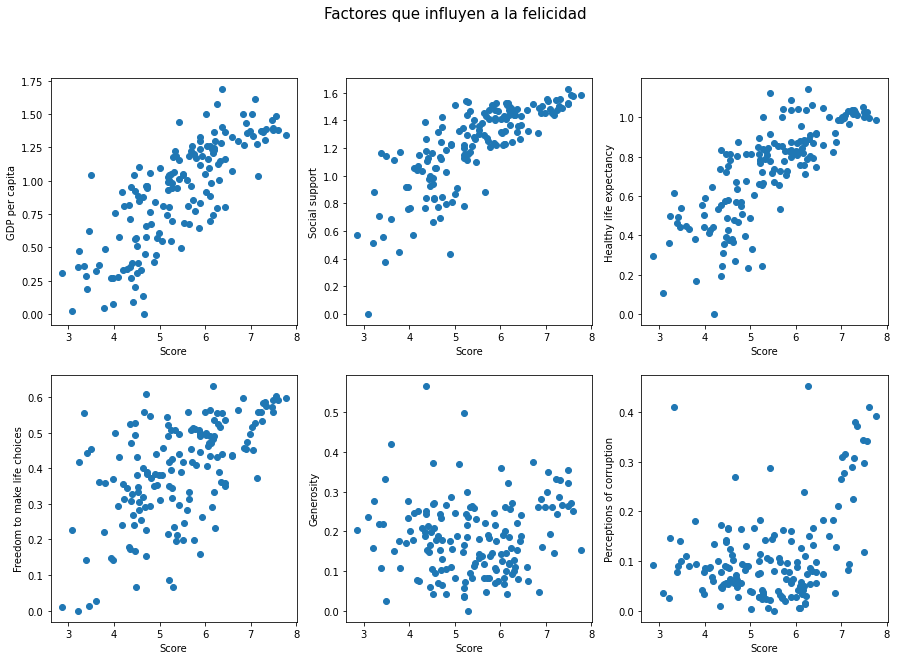

In [6]:
fig,axMatrix = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle("Factores que influyen a la felicidad", fontsize=15)
score = happiness.drop(labels=["Overall rank"], axis=1)

axMatrix[0,0].scatter(x="Score",y="GDP per capita",data=score)
axMatrix[0,0].set_xticks(np.arange(3,9,1))
axMatrix[0,0].set_xlabel("Score")
axMatrix[0,0].set_ylabel("GDP per capita")

axMatrix[0,1].scatter(x="Score",y="Social support",data=score)
axMatrix[0,1].set_xticks(np.arange(3,9,1))
axMatrix[0,1].set_xlabel("Score")
axMatrix[0,1].set_ylabel("Social support")

axMatrix[0,2].scatter(x="Score",y="Healthy life expectancy",data=score)
axMatrix[0,2].set_xticks(np.arange(3,9,1))
axMatrix[0,2].set_xlabel("Score")
axMatrix[0,2].set_ylabel("Healthy life expectancy")

axMatrix[1,0].scatter(x="Score",y="Freedom to make life choices",data=score)
axMatrix[1,0].set_xticks(np.arange(3,9,1))
axMatrix[1,0].set_xlabel("Score")
axMatrix[1,0].set_ylabel("Freedom to make life choices")

axMatrix[1,1].scatter(x="Score",y="Generosity",data=score)
axMatrix[1,1].set_xticks(np.arange(3,9,1))
axMatrix[1,1].set_xlabel("Score")
axMatrix[1,1].set_ylabel("Generosity")

axMatrix[1,2].scatter(x="Score",y="Perceptions of corruption",data=score)
axMatrix[1,2].set_xticks(np.arange(3,9,1))
axMatrix[1,2].set_xlabel("Score")
axMatrix[1,2].set_ylabel("Perceptions of corruption")


Comprueba lo anterior con un heatmap donde incluyas los índices de correlación:

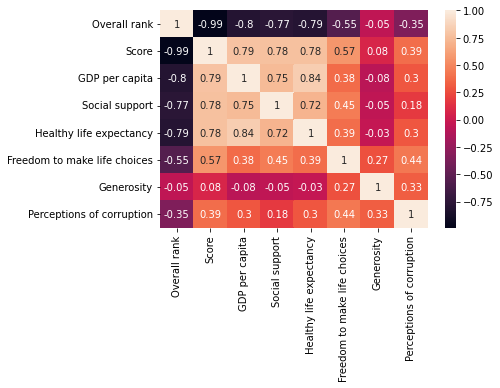

In [7]:
import seaborn as sns

sns.heatmap(round(happiness.corr(),2),annot=True)

Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región:

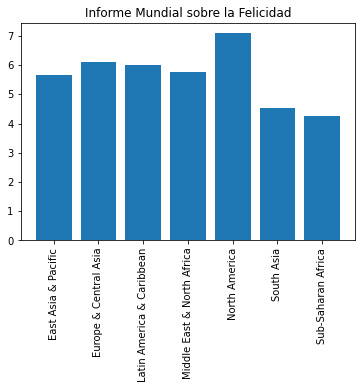

In [8]:
metadata = pd.read_csv("/content/Metadata.csv")
metadata = metadata.rename(columns = {'TableName':'Country or region'})
metadata = metadata.set_index('Country or region')

mergeScore = happiness.merge(metadata, on="Country or region")
mergeScore

groups = mergeScore.groupby('Region').mean()
axGroup = plt.bar(groups.index, "Score", data=groups)
axGroup = plt.title("Informe Mundial sobre la Felicidad")
axGroup = plt.xticks(rotation=90)
